# Исследование объявлений о продаже квартир


<a href='#Обзор данных'>1. Знакомство с данными</a>

<a href='#Предобработка данных'>2. Предобработка данных</a>
* <a href='#Обработка пропусков'>2.1 Обработка пропусков </a>
* <a href='#Изменение типа данных'>2.2 Изменение типа данных </a>

<a href='#Расчеты'>3. Добавление новых данных</a>
* <a href='#Цена квадратного метра'>3.1 Цена квадратного метра </a>
* <a href='#Дата публикации объявления'>3.2 Дата публикации объявления </a>
* <a href='#Этаж квартиры'>3.3 Этаж квартиры </a>
* <a href='#Соотношение жилой и общей площади, а также отношение площади кухни к общей'>3.4 Соотношение жилой и общей площади, а также отношение площади кухни к общей </a>
* <a href='#Параметры: площадь, цена, число комнат, высота потолков'>3.5 Параметры: площадь, цена, число комнат, высота потолков </a>

<a href='#Исследовательский анализ данных'>4. Исследовательский анализ данных</a>
* <a href='#Время продажи квартиры'>4.1 Время продажи квартиры </a>
* <a href='#Убираем редкие и выбивающиеся значения'>4.2 Убираем редкие и выбивающиеся значения </a>
* <a href='#Анализ факторов, которые больше всего влияют на стоимость квартиры'>4.3 Анализ факторов, которые больше всего влияют на стоимость квартиры </a>
* <a href='#Анализ предложения квартир'>4.4 Анализ предложения квартир </a>
* <a href='#Анализ сегмента квартир в центре'>4.5 Анализ сегмента квартир в центре </a>


<a href='#Общий вывод'>5. Общий вывод</a>


<a id='Обзор данных'></a>
### Шаг 1. Откройте файл с данными и изучите общую информацию. 

**Импорт библиотек, общая информация по данным**
* импортируем библиотеки для дальнейшей работы с данными
* с помощью функции info() получим общую информацию о таблице;
* с помощью функции describe() получим общие статистические данные для каждого столбца таблицы.

In [9]:
#импортируем библиотеки для дальнейшей работы

import pandas as pd #для описания и анализа данных
import seaborn as sns #для красивых графиков
import matplotlib.pyplot as plt # для работы с графиками
#магия, чтобы график был сразу после выполнения кода
%matplotlib inline 
import numpy as np # для эффективной работы с вычислениями и большими массивами
from datetime import datetime  # для получения дня недели из даты

In [10]:
#Откроем данные
df = pd.read_csv('real_estate_data.csv', sep='\t')

#Изучим данные с помощью функции вывода части таблицы на экран head()
df.head(15)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.00,2019-03-07T00:00:00,3,2.70,16.0,51.00,8,NaN,...,25.00,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.40,2018-12-04T00:00:00,1,NaN,11.0,18.60,1,NaN,...,11.00,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.00,2015-08-20T00:00:00,2,NaN,5.0,34.30,4,NaN,...,8.30,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.00,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.00,2018-06-19T00:00:00,2,3.03,14.0,32.00,13,NaN,...,41.00,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0
5,10,2890000.0,30.40,2018-09-10T00:00:00,1,NaN,12.0,14.40,5,NaN,...,9.10,NaN,городской посёлок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.0
6,6,3700000.0,37.30,2017-11-02T00:00:00,1,NaN,26.0,10.60,6,NaN,...,14.40,1.0,посёлок Парголово,52996.0,19143.0,0.0,NaN,0.0,NaN,155.0
7,5,7915000.0,71.60,2019-04-18T00:00:00,2,NaN,24.0,NaN,22,NaN,...,18.90,2.0,Санкт-Петербург,23982.0,11634.0,0.0,NaN,0.0,NaN,NaN
8,20,2900000.0,33.16,2018-05-23T00:00:00,1,NaN,27.0,15.43,26,NaN,...,8.81,NaN,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,189.0
9,18,5400000.0,61.00,2017-02-26T00:00:00,3,2.50,9.0,43.60,7,NaN,...,6.50,2.0,Санкт-Петербург,50898.0,15008.0,0.0,NaN,0.0,NaN,289.0


**Описание данных**

* **total_images** — число фотографий квартиры в объявлении;
* **last_price** — цена на момент снятия с публикации;
* **total_area** — площадь квартиры в квадратных метрах (м²);
* **first_day_exposition** — дата публикации;
* **rooms** — число комнат;
* **ceiling_height** — высота потолков (м);
* **floors_total** — всего этажей в доме;
* **living_area** — жилая площадь в квадратных метрах(м²);
* **floor** — этаж;
* **is_apartment** — апартаменты (булев тип);
* **open_plan** — свободная планировка (булев тип);
* **studio** — квартира-студия (булев тип);
* **kitchen_area** — площадь кухни в квадратных метрах (м²);
* **balcony** — число балконов;
* **locality_name** — название населённого пункта;
* **airports_nearest** — расстояние до ближайшего аэропорта в метрах (м);
* **cityCenters_nearest** — расстояние до центра города (м);
* **parks_around3000** — число парков в радиусе 3 км;
* **parks_nearest** — расстояние до ближайшего парка (м);
* **ponds_around3000** — число водоёмов в радиусе 3 км;
* **ponds_nearest** — расстояние до ближайшего водоёма (м);
* **days_exposition** — сколько дней было размещено объявление (от публикации до снятия).

In [11]:
#Изучим общую информацию по данным с помощью функции info()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

* таблица с данными состоит из 23699 строк и 22 столбцов;
* в данных много пропущенных значений, отметим такие столбцы:
  - ceiling_height - высота потолков;
  - floors_total - всего этажей в доме;
  - living_area - жилая площадь в м2;
  - is_apartment - апартаменты (булев массив)
  - kitchen_area - площадь кухни в м2;
  - balcony - число балконов;
  - locality_name - название населенного пункта;
  - airports_nearest - расстояние до ближайшего аэропорта (м);
  - cityCenters_nearest - расстояние до центра города (м);
  - parks_around3000 -  число парков в радиусе 3 км;
  - parks_nearest - расстояние до ближайшего парка (м);
  - ponds_around3000 - число водоёмов в радиусе 3 км;
  - ponds_nearest - расстояние до ближайшего водоёма (м);
  - days_exposition - сколько дней было размещено объявление (от публикации до снятия).
  
* изменим некоторые типы данных в столбцах:
  - столбцы last_price, total_area, ceiling_height, floors_total, living_area, kitchen_area, balcony, airports_nearest, cityCenters_nearest, parks_around3000, parks_nearest, ponds_around3000, ponds_nearest, days_exposition - имеют вещественный тип данных, такая точность нам не нужна, заменим на целочисленный
  - first_day_exposition - имеет тип данных object, заменим на дату
  - is_apartment - имеет тип данных object, необходимо заменить на булевые значения
* наименования столбцов соответсвуют их содержанию, воспользуемся функцией set_axis(), чтобы комфортно работать с данными без возможных ошибок. 


In [12]:
df.describe() 

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
count,23699.000000,2.369900e+04,23699.000000,23699.000000,14504.000000,23613.000000,21796.000000,23699.000000,21421.000000,12180.000000,18157.000000,18180.000000,18181.000000,8079.000000,18181.000000,9110.000000,20518.000000
mean,9.858475,6.541549e+06,60.348651,2.070636,2.771499,10.673824,34.457852,5.892358,10.569807,1.150082,28793.672193,14191.277833,0.611408,490.804555,0.770255,517.980900,180.888634
std,5.682529,1.088701e+07,35.654083,1.078405,1.261056,6.597173,22.030445,4.885249,5.905438,1.071300,12630.880622,8608.386210,0.802074,342.317995,0.938346,277.720643,219.727988
min,0.000000,1.219000e+04,12.000000,0.000000,1.000000,1.000000,2.000000,1.000000,1.300000,0.000000,0.000000,181.000000,0.000000,1.000000,0.000000,13.000000,1.000000
25%,6.000000,3.400000e+06,40.000000,1.000000,2.520000,5.000000,18.600000,2.000000,7.000000,0.000000,18585.000000,9238.000000,0.000000,288.000000,0.000000,294.000000,45.000000
50%,9.000000,4.650000e+06,52.000000,2.000000,2.650000,9.000000,30.000000,4.000000,9.100000,1.000000,26726.000000,13098.500000,0.000000,455.000000,1.000000,502.000000,95.000000
75%,14.000000,6.800000e+06,69.900000,3.000000,2.800000,16.000000,42.300000,8.000000,12.000000,2.000000,37273.000000,16293.000000,1.000000,612.000000,1.000000,729.000000,232.000000
max,50.000000,7.630000e+08,900.000000,19.000000,100.000000,60.000000,409.700000,33.000000,112.000000,5.000000,84869.000000,65968.000000,3.000000,3190.000000,3.000000,1344.000000,1580.000000


В данных попадаются странные значения:
* максимальное количество комнат - 19 (целый дворец)
* максимальная высота потока - 100 м
* 60 этажей тоже многовато, хоть и возможно
* жилая площадь 409 кв.м
* кухня на 112 кв.м


**Выводы:**
1. В данных довольно много пропущенных значений, необходимо разобрать каждый такой столбец, предположить природу возникновения пропущенных значений и предложить вариант заполнения, если это уместно, чтобы в дальнейшем при анализе получить корректные данные;
2. Необходимо изменить тип некоторых данных для дальнейшей комфортной работы;
3. Помимо пропусков в данных есть аномально большие и нереалистичные значения, нужно будет учесть это при анализе.
4. Также проверим наличие дублей в данных и избавимся от них, если таковые пристуствуют.

<a id='Предобработка данных'></a>
### Шаг 2. Предобработка данных

<a id='Обработка пропусков'></a>
#### *2.1 Обработка пропусков*

- Проверим, насколько много пропущенных значений в столбцах и можем ли мы какими-нибудь пропусками пренебречь без особого влияния на результат анализа данных.
- Обработаем каждый столбец с порпусками по очереди.

In [13]:
df.isna().mean().sort_values(ascending=False)

is_apartment            0.882906
parks_nearest           0.659100
ponds_nearest           0.615596
balcony                 0.486054
ceiling_height          0.387991
airports_nearest        0.233850
cityCenters_nearest     0.232879
parks_around3000        0.232837
ponds_around3000        0.232837
days_exposition         0.134225
kitchen_area            0.096122
living_area             0.080299
floors_total            0.003629
locality_name           0.002068
first_day_exposition    0.000000
last_price              0.000000
total_area              0.000000
studio                  0.000000
rooms                   0.000000
floor                   0.000000
open_plan               0.000000
total_images            0.000000
dtype: float64

1. Больше всего пропусков в столбце **is_apartment** - как вариант, рассматриваются обявления в жилых комплексах, поэтому маловероятно, что коммерческих помещений будет много, предлагаю заполнить пропуски значением False.
2. **parks_nearest** и **ponds_nearest** - пропусков больше 60% - это довольно много,  для заполнения пропусков возьмем медианое значение в зависимости от населенного пункта.
3. **"balcony"** - незаполненные пропуски по количеству балконов могут испорить нам итоговые данные, поэтому их следует заполнить. Предоположу, что пропуски по этому столбцу означают отсутствие балкона и заполню все пропущенные значения нулями.
4. **ceiling_height** - высота полоков тоже довольно важный критерий, как мне кажется. Для заполнения пропусков возьмем медианое значение в зависимости от населенного пункта.
5. **airports_nearest** и **cityCenters_nearest**, **parks_around3000** и **ponds_around3000** - пропущенных значений в данных столбцах не так много, но все равно заполним их медианым значением в зависимости от населенного пункта.
6. **days_exposition** -  будем считать данные с пропущенными значениями в данном столбце означают, что обявление ещё не снято с продажи. Заполним пропуски в этом столбце значением маркером 777777.
7. **kitchen_area**, **living_area** - рассчитаем средний коэффициент отношения площади кухни к общей площади и коэффициент жилой площади к общей. Средний коэффициент по населенному пункту умножим на общую площадь обяъвления, где пропущены значения. 
8. **floors_total** и **locality_name** - пропущенных значений очень мало, их можно удалить.

- ```is_apartment```

In [14]:
df['is_apartment'] = df['is_apartment'].fillna(False)
df['is_apartment'].isna().sum()

0

- ```balcony```

In [15]:
df['balcony'] = df['balcony'].fillna(0)
df['balcony'].isna().sum()

0

- ```locality_name и floors_total```

In [16]:
#удаляем пропущенные значения в столбцах
df['locality_name'] = df['locality_name'].dropna().reset_index(drop=True)
df['floors_total'] = df['floors_total'].dropna().reset_index(drop=True)

- ```ceiling_height```

In [17]:
#категоризируем данные по населенному пункту и посчитаем медианное значение по известным данным высоты столбца для каждой категории
df_grouped_locality_1 = df.groupby('locality_name')['ceiling_height'].median()

#для высоты потолка
for loc_name in df_grouped_locality_1.index:
    df.loc[df['locality_name'] == loc_name,'ceiling_height'] = df.loc[df['locality_name'] == loc_name,'ceiling_height'].fillna(df_grouped_locality_1[loc_name])

- ```airports_nearest и cityCenters_nearest```

In [18]:
#для удаленности от аэропорта
df_grouped_locality_2 = df.groupby('locality_name')['airports_nearest'].median()
for loc_name in df_grouped_locality_2.index:
    df.loc[df['locality_name'] == loc_name,'airports_nearest'] = df.loc[df['locality_name'] == loc_name,'airports_nearest'].fillna(df_grouped_locality_2[loc_name])
    
#для удаленности от центра
df_grouped_locality_3 = df.groupby('locality_name')['cityCenters_nearest'].median()
for loc_name in df_grouped_locality_3.index:
    df.loc[df['locality_name'] == loc_name,'cityCenters_nearest'] = df.loc[df['locality_name'] == loc_name,'cityCenters_nearest'].fillna(df_grouped_locality_3[loc_name])

- ```parks_around3000 и ponds_around3000```

In [19]:
#для количества парков в радиусе 3000 км
df_grouped_locality_4 = df.groupby('locality_name')['parks_around3000'].median()
for loc_name in df_grouped_locality_4.index:
    df.loc[df['locality_name'] == loc_name,'parks_around3000'] = df.loc[df['locality_name'] == loc_name,'parks_around3000'].fillna(df_grouped_locality_4[loc_name])
    
#для количества водоемов в радиусе 3000 км
df_grouped_locality_5 = df.groupby('locality_name')['ponds_around3000'].median()
for loc_name in df_grouped_locality_5.index:
    df.loc[df['locality_name'] == loc_name,'ponds_around3000'] = df.loc[df['locality_name'] == loc_name,'ponds_around3000'].fillna(df_grouped_locality_5[loc_name])

- ```days_exposition``` - будем считать данные с пропущенными значениями в данном столбце означают, что обявление ещё не снято с продажи. Заполним пропуски в этом столбце значением маркером **777777**

In [20]:
df['days_exposition'] = df['days_exposition'].fillna(777777)

- ```kitchen_area, living_area```

In [21]:
#рассчитаем коэффициенты
df['part_living_area'] = df['living_area']/df['total_area']
df['part_kitchen_area'] = df['kitchen_area']/df['total_area']

In [22]:
#для определения общей площади кухни
df_grouped_locality_6 = df.groupby('locality_name')['part_kitchen_area'].median()

for loc_name in df_grouped_locality_6.index:
    df.loc[df['locality_name'] == loc_name,'kitchen_area'] = df.loc[df['locality_name'] == loc_name,'kitchen_area'].fillna(df_grouped_locality_6[loc_name] * df['total_area'])

In [23]:
#для определения общей площади жилья
df_grouped_locality_7 = df.groupby('locality_name')['part_living_area'].median()
for loc_name in df_grouped_locality_7.index:
    df.loc[df['locality_name'] == loc_name,'living_area'] = df.loc[df['locality_name'] == loc_name,'living_area'].fillna(df_grouped_locality_7[loc_name] * df['total_area'])


- ```parks_nearest и ponds_nearest```

In [24]:
#для определения удаленности от парка
df_grouped_locality_9 = df.groupby('locality_name')['parks_nearest'].median()
for loc_name in df_grouped_locality_9.index:
    df.loc[df['locality_name'] == loc_name,'parks_nearest'] = df.loc[df['locality_name'] == loc_name,'parks_nearest'].fillna(df_grouped_locality_9[loc_name])
   
 #для определения удаленности от водоемов
df_grouped_locality_10 = df.groupby('locality_name')['ponds_nearest'].median()
for loc_name in df_grouped_locality_10.index:
    df.loc[df['locality_name'] == loc_name,'ponds_nearest'] = df.loc[df['locality_name'] == loc_name,'ponds_nearest'].fillna(df_grouped_locality_10[loc_name])


In [25]:
#Проверим наши замены и количество оставшихся пропущенных значений в столбцах
df.isna().mean().sort_values(ascending=False)

part_kitchen_area       0.096122
part_living_area        0.080299
ponds_nearest           0.008524
parks_nearest           0.008270
floors_total            0.003629
ceiling_height          0.003207
cityCenters_nearest     0.002110
airports_nearest        0.002110
parks_around3000        0.002110
ponds_around3000        0.002110
locality_name           0.002068
kitchen_area            0.000506
living_area             0.000506
total_area              0.000000
first_day_exposition    0.000000
rooms                   0.000000
last_price              0.000000
open_plan               0.000000
floor                   0.000000
is_apartment            0.000000
studio                  0.000000
balcony                 0.000000
days_exposition         0.000000
total_images            0.000000
dtype: float64

- значения столбцов **part_kitchen_area и part_living_area** заполним медианным значением по столбцу
- в остальных столбцах пропущенных значений осталось совсем немного, можем их оставить

In [26]:
#замена пропущенных значений на медиану по столбцу
df['part_kitchen_area'] = df['part_kitchen_area'].fillna(df['part_kitchen_area'].median())
df['part_living_area'] = df['part_living_area'].fillna(df['part_living_area'].median())


In [27]:
#проверка
df.isna().mean().sort_values(ascending=False)

ponds_nearest           0.008524
parks_nearest           0.008270
floors_total            0.003629
ceiling_height          0.003207
ponds_around3000        0.002110
parks_around3000        0.002110
cityCenters_nearest     0.002110
airports_nearest        0.002110
locality_name           0.002068
living_area             0.000506
kitchen_area            0.000506
part_kitchen_area       0.000000
last_price              0.000000
total_area              0.000000
first_day_exposition    0.000000
rooms                   0.000000
open_plan               0.000000
floor                   0.000000
is_apartment            0.000000
studio                  0.000000
part_living_area        0.000000
balcony                 0.000000
days_exposition         0.000000
total_images            0.000000
dtype: float64

In [28]:
#Проверим данные на наличие дублей

df.duplicated().sum()

0

<a id='Изменение типа данных'></a>
#### *2.2 Изменение типа данных*
* изменим вещественный тип данных на целочисленный
* определим формат даты

In [29]:
#изменим вещественный тип данных на целочисленный в данных, подобная точность по указанным столбцам нам не нужна
list_to_int = ['last_price', 'total_area', 'floors_total', 'kitchen_area', 'living_area', 'balcony', 
                'cityCenters_nearest', 'parks_around3000', 'parks_nearest', 'ponds_around3000', 'ponds_nearest', 
                'days_exposition','airports_nearest']

#позже добавили столбцы'price_m2', 'part_living_area', 'part_kitchen_area'

for column in list_to_int:
    df[column] = df[df[column].notnull()][column].astype('int')

In [30]:
#определим дату в столбце 'first_day_exposition'
df['first_day_exposition'] = pd.to_datetime(df['first_day_exposition'], dayfirst=True)                    

In [31]:
#Проверим, что получилось
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 24 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          23699 non-null  int64         
 1   last_price            23699 non-null  int32         
 2   total_area            23699 non-null  int32         
 3   first_day_exposition  23699 non-null  datetime64[ns]
 4   rooms                 23699 non-null  int64         
 5   ceiling_height        23623 non-null  float64       
 6   floors_total          23613 non-null  float64       
 7   living_area           23687 non-null  float64       
 8   floor                 23699 non-null  int64         
 9   is_apartment          23699 non-null  bool          
 10  studio                23699 non-null  bool          
 11  open_plan             23699 non-null  bool          
 12  kitchen_area          23687 non-null  float64       
 13  balcony         

**Выводы**

1. Мы избавились от пропусков в значениях, частично заменив их на медианные, частично заменив на значения маркеры для дальнейшего анализа:
    - **days_exposition - 777777**
2. Проверили данные на наличие дублей - таких не оказалось
3. Привели значения к комфортному и распознаваемому типу данных

Теперь, когда все необходимые данные присутствуют, можем приступать к их анализу.


<a id='Расчеты'></a>
### Шаг 3. Посчитайте и добавьте в таблицу

<a id='Цена квадратного метра'></a>
#### *3.1 Цена квадратного метра*

In [32]:
#добавим цену кв.м
df['price_m2'] = df['last_price']/df['total_area']
df['price_m2'] = df['price_m2'].astype('int')

<a id='Дата публикации объявления'></a>
#### *3.2 Дата публикации объявления*

In [33]:
#добавим год публикации
df['year'] = df['first_day_exposition'].apply(lambda x: x.year)

#добавим месяц пцбликации
df['month'] = df['first_day_exposition'].apply(lambda x: x.month)

In [34]:
df['day'] = df['first_day_exposition'].apply(lambda x: x.isoweekday())
#получиили дни недели, где 1 - понедельник, а 7 - воскресенье, заменим на привычные названия дней недели от пн-вс

#создаем словарик
dict_of_weekdays = {1: 'понедельник', 2: 'вторник', 3: 'среда', 4: 'четверг', 
                    5: 'пятница', 6: 'суббота', 7: 'воскресенье'}

#заменяем значения
df['day'] = df['day'].map(dict_of_weekdays)

In [35]:
df.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,part_living_area,part_kitchen_area,price_m2,year,month,day
0,20,13000000,108,2019-03-07,3,2.70,16.0,51.0,8,False,...,482.0,2.0,755.0,777777,0.472222,0.231481,120370,2019,3,четверг
1,7,3350000,40,2018-12-04,1,2.65,11.0,18.0,1,False,...,429.0,0.0,536.0,81,0.460396,0.272277,83750,2018,12,вторник
2,10,5196000,56,2015-08-20,2,2.65,5.0,34.0,4,False,...,90.0,2.0,574.0,558,0.612500,0.148214,92785,2015,8,четверг
3,0,64900000,159,2015-07-24,3,2.65,14.0,90.0,9,False,...,84.0,3.0,234.0,424,0.567860,0.172414,408176,2015,7,пятница
4,2,10000000,100,2018-06-19,2,3.03,14.0,32.0,13,False,...,112.0,1.0,48.0,121,0.320000,0.410000,100000,2018,6,вторник


<a id='Этаж квартиры'></a>
#### *3.3 Этаж квартиры*

In [36]:
#категоризируем этажи (варианты — первый, последний, другой)
df['floor_cat'] = np.where(df['floor'] == 1, 'первый', 'другой')
df['floor_cat'] = np.where(df['floor'] == df['floors_total'], 'последний', df['floor_cat'])
df.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,ponds_around3000,ponds_nearest,days_exposition,part_living_area,part_kitchen_area,price_m2,year,month,day,floor_cat
0,20,13000000,108,2019-03-07,3,2.70,16.0,51.0,8,False,...,2.0,755.0,777777,0.472222,0.231481,120370,2019,3,четверг,другой
1,7,3350000,40,2018-12-04,1,2.65,11.0,18.0,1,False,...,0.0,536.0,81,0.460396,0.272277,83750,2018,12,вторник,первый
2,10,5196000,56,2015-08-20,2,2.65,5.0,34.0,4,False,...,2.0,574.0,558,0.612500,0.148214,92785,2015,8,четверг,другой
3,0,64900000,159,2015-07-24,3,2.65,14.0,90.0,9,False,...,3.0,234.0,424,0.567860,0.172414,408176,2015,7,пятница,другой
4,2,10000000,100,2018-06-19,2,3.03,14.0,32.0,13,False,...,1.0,48.0,121,0.320000,0.410000,100000,2018,6,вторник,другой


<a id='Соотношение жилой и общей площади, а также отношение площади кухни к общей'></a>
#### *3.4 Соотношение жилой и общей площади, а также отношение площади кухни к общей*

In [37]:
#дополнительные признаки создала в шаге 2 для использования в обработке пропущенных значений
df.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,ponds_around3000,ponds_nearest,days_exposition,part_living_area,part_kitchen_area,price_m2,year,month,day,floor_cat
0,20,13000000,108,2019-03-07,3,2.70,16.0,51.0,8,False,...,2.0,755.0,777777,0.472222,0.231481,120370,2019,3,четверг,другой
1,7,3350000,40,2018-12-04,1,2.65,11.0,18.0,1,False,...,0.0,536.0,81,0.460396,0.272277,83750,2018,12,вторник,первый
2,10,5196000,56,2015-08-20,2,2.65,5.0,34.0,4,False,...,2.0,574.0,558,0.612500,0.148214,92785,2015,8,четверг,другой
3,0,64900000,159,2015-07-24,3,2.65,14.0,90.0,9,False,...,3.0,234.0,424,0.567860,0.172414,408176,2015,7,пятница,другой
4,2,10000000,100,2018-06-19,2,3.03,14.0,32.0,13,False,...,1.0,48.0,121,0.320000,0.410000,100000,2018,6,вторник,другой


<a id='Параметры: площадь, цена, число комнат, высота потолков'></a>
#### *3.5 Параметры: площадь, цена, число комнат, высота потолков*

In [39]:
#изучим полученные данные с помощью функции describe()
df[['total_area', 'last_price', 'rooms', 'ceiling_height']].describe()

,total_area,last_price,rooms,ceiling_height
count,23699.000000,2.369900e+04,23699.000000,23623.000000
mean,60.120511,6.541549e+06,2.070636,2.724843
std,35.665822,1.088701e+07,1.078405,0.990140
min,12.000000,1.219000e+04,0.000000,1.000000
25%,40.000000,3.400000e+06,1.000000,2.600000
50%,52.000000,4.650000e+06,2.000000,2.650000
75%,69.000000,6.800000e+06,3.000000,2.700000
max,900.000000,7.630000e+08,19.000000,100.000000


1. Площадь жилых помещений максимальная - 900 м2, минимальная - 12 м2
2. Цена максимальная 763 млн, а мин 12 тыс (интересно, что за жилье за 12 тыс)
3. Число комнат максимальное 19 - тоже странно, хоть и возможно, может быть это чей-то пентхаус
4. Высота пололка максимальная 100 м, тоже странно.

В целом, данные выглядят реалистично, можем посмотреть, как будут выглядеть данные на графиках.

- ```total_area```

Text(0, 0.5, 'Количество объявлений')

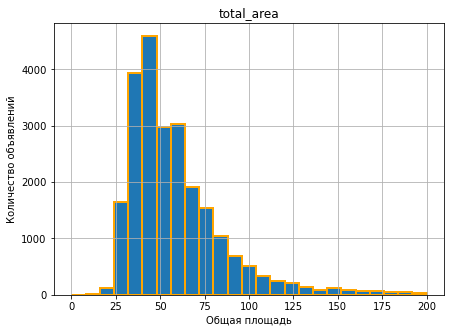

In [40]:
df.plot(kind='hist', y='total_area', range=(0,200), bins=25, linewidth=2, grid=True, figsize=(7,5), ec='orange', title='total_area', legend = False)
plt.xlabel('Общая площадь')
plt.ylabel('Количество объявлений')

(0.0, 200.0)

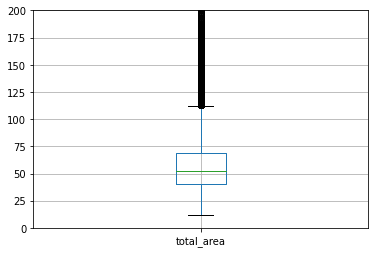

In [41]:
df.boxplot(column='total_area')
plt.ylim(0, 200)

- ```last_price```

Text(0, 0.5, 'Количество объявлений')

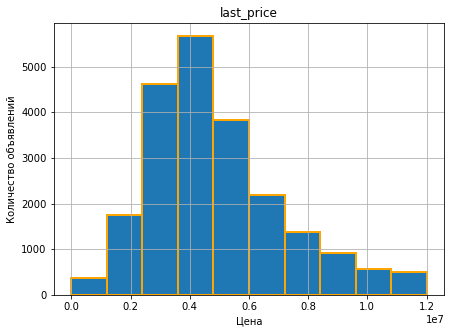

In [42]:
df.plot(kind='hist', y='last_price', range=(0,12000000), bins=10, linewidth=2, grid=True, figsize=(7,5), ec='orange', title='last_price', legend = False)
plt.xlabel('Цена')
plt.ylabel('Количество объявлений')

(0.0, 15000000.0)

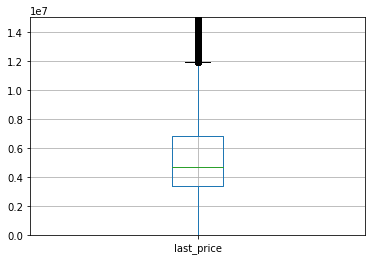

In [43]:
df.boxplot(column='last_price')
plt.ylim(0, 15000000)

- ```rooms```

Text(0, 0.5, 'Количество объявлений')

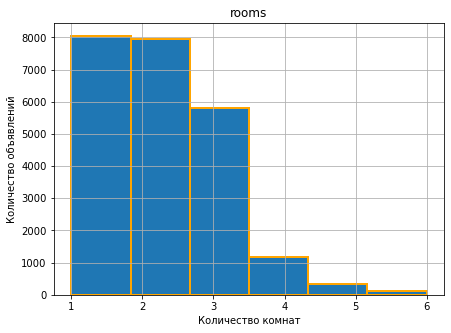

In [44]:
df.plot(kind='hist', y='rooms', range=(1,6), bins=6, linewidth=2, grid=True, figsize=(7,5), ec='orange', title='rooms', legend = False)
plt.xlabel('Количество комнат')
plt.ylabel('Количество объявлений')

(0.0, 10.0)

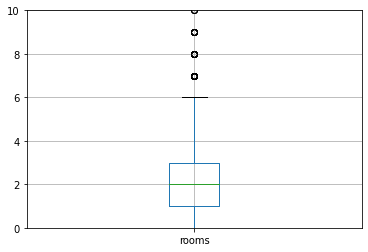

In [45]:
df.boxplot(column='rooms')
plt.ylim(0, 10)

- ```ceiling_height```

Text(0, 0.5, 'Количество объявлений')

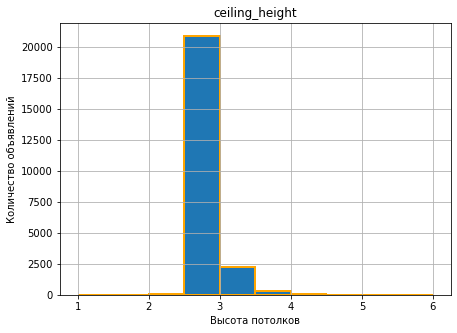

In [46]:
df.plot(kind='hist', y='ceiling_height', range=(1,6), bins=10, linewidth=2, grid=True, figsize=(7,5), ec='orange', title='ceiling_height', legend = False)
plt.xlabel('Высота потолков')
plt.ylabel('Количество объявлений')

(0.0, 4.0)

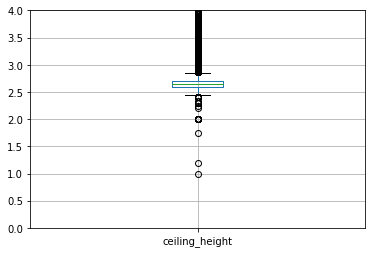

In [47]:
df.boxplot(column='ceiling_height')
plt.ylim(0, 4)

**Выводы:**

1. **total_area** - общая площадь продаваемых квартир варьируется в большинстве своем от 25 до 50 кв.м.
2. **last_price** - средняя стоимость жилья около 4,5 млн руб. Большая часть недвижимости продается по стоимости в диапазоне от 3 до 6,7 млн руб.
3. **rooms** - в большинстве своем продаются двухкомнатные квартиры, хотя есть и уникальные предложения с количеством комнат больше 10, но это редкие выбросы.
4. **ceiling_height** - высота потолков в среднем 2 м, есть и выше, но это редкие явления.

<a id='Исследовательский анализ данных'></a>
### Шаг 4. Проведите исследовательский анализ данных и выполните инструкции:

<a id='Время продажи квартиры'></a>
#### *4.1 Время продажи квартиры*

In [48]:
#изучим основную статистическую инфомрацию по времени продажи квартиры, сделав сред по значению маркеру 777777
df = df.query('days_exposition < 777777')
df['days_exposition'].describe().to_frame()

,days_exposition
count,20518.000000
mean,180.888634
std,219.727988
min,1.000000
25%,45.000000
50%,95.000000
75%,232.000000
max,1580.000000


1. Медианное время продаж квартиры 3 месяца - очень похоже на правду и это неплохой показатель. 
2. Средний показатель полгода - тоже неплохо, но на него ведь влияют наши выбросы, будем брать во внимание медианное значение.
2. Максимальное количество 4 с лишним года - вероятно, про эти обявления просто забыли, либо такое уникальное предложение ждет не менее уникального покупателя.
3. А кому-то удалось осуществить выгодную сделку всего за 1 день день, здорово.

Text(0, 0.5, 'Количество объявлений')

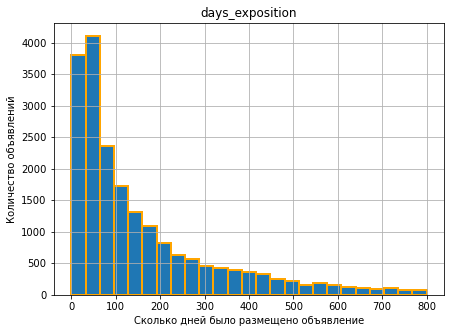

In [49]:
df.plot(kind='hist', y='days_exposition', range=(0,800), bins=25, linewidth=2, grid=True, figsize=(7,5), ec='orange', title='days_exposition', legend = False)
plt.xlabel('Cколько дней было размещено объявление')
plt.ylabel('Количество объявлений')

Исходя из данных гистограммы, большая часть квартир продавалась в течение 3-х месяцев.

(0.0, 1000.0)

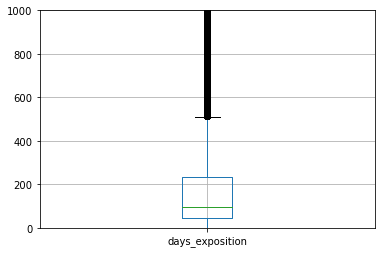

In [50]:
df.boxplot(column='days_exposition')
plt.ylim(0, 1000)

<a id='Убираем редкие и выбивающиеся значения'></a>
#### *4.2 Убираем редкие и выбивающиеся значения*

- Среднее время продажи квартиры - полгода, посмотрим, есть ли закономерности в течение самого продаваемого времени.

In [51]:
df['days_exposition'].describe() 

count    20518.000000
mean       180.888634
std        219.727988
min          1.000000
25%         45.000000
50%         95.000000
75%        232.000000
max       1580.000000
Name: days_exposition, dtype: float64

Text(0, 0.5, 'Количество объявлений')

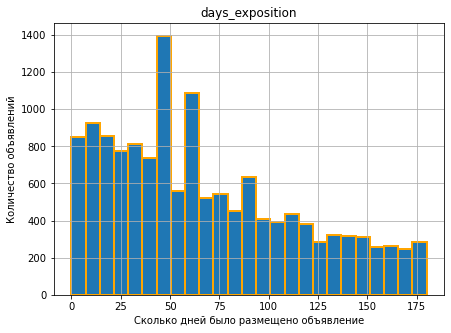

In [52]:
df.plot(kind='hist', y='days_exposition', range=(0,180), bins=25, linewidth=2, grid=True, figsize=(7,5), ec='orange', title='days_exposition', legend = False)
plt.xlabel('Cколько дней было размещено объявление')
plt.ylabel('Количество объявлений')

Есть 2 явно выбивающихся значения в первые 3 месяца, посмотрим, что это за счастливые дни продаж.

Text(0, 0.5, 'Количество объявлений')

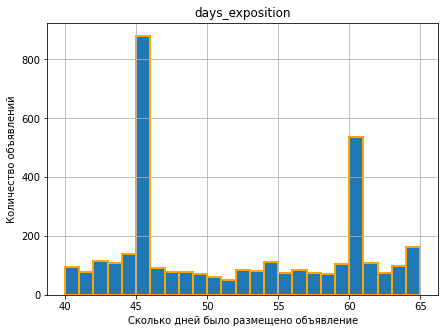

In [53]:
df.query('30<days_exposition<70')['days_exposition'].plot(kind='hist', y='days_exposition', range=(40,65), bins=25, linewidth=2, grid=True, figsize=(7,5), ec='orange', title='days_exposition', legend = False)
plt.xlabel('Cколько дней было размещено объявление')
plt.ylabel('Количество объявлений')

В 45 день и на 60 день самые высокие показатели по продаже квартир. В середине месяца и в конце месяца обычно все получают зарплату, как вариант, может быть комфортнее и крупные покупки совершать в эти дни. Или же ресурс, где находятся обявления, подводит итоге в эти дни и сюда попадают люди, которые сами не сняли объявление о продаже, хотя сделку совершили.

In [54]:
df[['total_area', 'last_price', 'rooms', 'ceiling_height']].describe()

,total_area,last_price,rooms,ceiling_height
count,20518.000000,2.051800e+04,20518.000000,20448.000000
mean,58.647821,6.266173e+06,2.024564,2.716112
std,34.088953,1.086298e+07,1.054808,0.972042
min,12.000000,1.219000e+04,0.000000,1.000000
25%,39.000000,3.400000e+06,1.000000,2.600000
50%,50.000000,4.500000e+06,2.000000,2.650000
75%,67.000000,6.500000e+06,3.000000,2.700000
max,900.000000,7.630000e+08,19.000000,100.000000


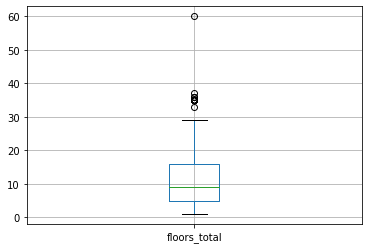

In [55]:
df.boxplot(column='floors_total')

In [100]:
#уберем выбивающиеся значения по показателям: площадь, цена, число комнат, высота потолков и время продажи квартиры, этаж на + - 1.5 межквартильного размаха
df['total_area'] = df.query('15<=total_area<=115')['total_area']
df['last_price'] = df.query('3000000<=last_price<=12000000')['last_price']
df['rooms'] = df.query('1<=rooms<=6')['rooms']
df['ceiling_height'] = df.query('2.4<=ceiling_height<=2.8')['ceiling_height']
df['days_exposition'] = df.query('50<=days_exposition<=900')['days_exposition']
df['floors_total'] = df.query('floors_total<=30')['floors_total']

import warnings
warnings.filterwarnings('ignore')

<a id='Анализ факторов, которые больше всего влияют на стоимость квартиры'></a>
#### *4.3 Анализ факторов, которые больше всего влияют на стоимость квартиры*

- **Зависимость цены от общей площади квартиры**

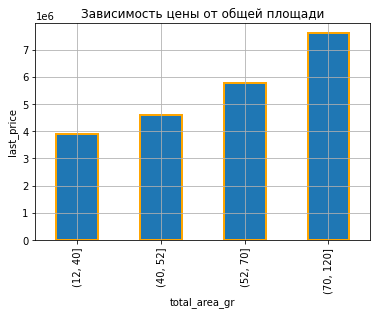

In [101]:
#сгруппируем общую площадь с помощью метода cut() и построим сводную табличку для цены квартиры в зависимости от площади
df['total_area_gr'] = pd.cut(df['total_area'],[12, 40, 52, 70, 120,900])
df.pivot_table(index='total_area_gr',values='last_price')

#визуализируем с помощью графика
df.pivot_table(index='total_area_gr',values='last_price').plot(y='last_price', kind='bar', grid=True, ec='orange', linewidth=2, title='Зависимость цены от общей площади', legend = False)
plt.xlabel('total_area_gr')
plt.ylabel('last_price')

import warnings
warnings.filterwarnings('ignore')

Из графика четко видно, что чем больше площадь, тем выше средняя стоимость квартиры. Но это довольно обобщенные данные, рассмотрим также зависимости данных величин по показателю Пирсона и с помощью диаграммы рассеяния.

In [103]:
#Мы можем оценить влияние одной величины на другую с помощью коэффициента Пирсона, метод corr()
df['last_price'].corr(df['total_area'])

0.7144755512585952

Коэффициент 0,72 говорит о том, что да, при увеличении площади растет и стоимость, но так бывает не всегда.

(0.0, 8000000.0)

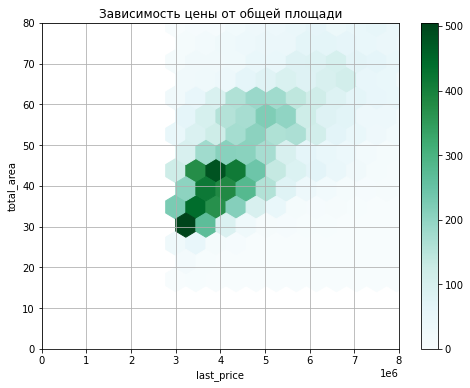

In [104]:
df.plot(x='last_price', y='total_area', kind='hexbin', gridsize=20, figsize=(8, 6), sharex=False, grid=True, title='Зависимость цены от общей площади', legend = False)
plt.ylim(0, 80)
plt.xlim(0, 8000000)

- Да, связь есть, она стала теснее, но по-прежнему не всегда стоимость квартиры коррелирует с общей площадью. 
- Из графика мы видим, что больше всего продаж квартир по стоимости от 3-3.5 млн с площадью от 28 до 35 кв.м.

- **Зависимость цены от количества комнат**

In [105]:
#рассмтрим зависимость с помощью сводной таблицы
df.pivot_table(index='rooms',values='last_price')

,last_price
rooms,
1.0,4.284079e+06
2.0,5.506094e+06
3.0,6.360143e+06
4.0,7.282407e+06
5.0,8.955576e+06
6.0,9.842214e+06


Text(0, 0.5, 'last_price')

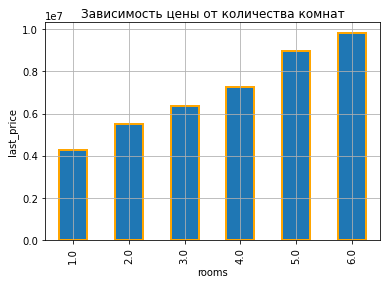

In [106]:
#визуализируем полученные данные с помощью графика
df.pivot_table(index='rooms',values='last_price').plot(y='last_price', kind='bar', grid=True, ec='orange', linewidth=2, title='Зависимость цены от количества комнат', legend = False)
plt.xlabel('rooms')
plt.ylabel('last_price')

Судя графику, чем больше комнат, тем выше стоимость, что логично. Проверим, насколько часто встречается такая зависимость.

In [107]:
#рассчитаем коэффициент Пирсона
df['last_price'].corr(df['rooms'])

0.46480097665375303

(0.0, 5.0)

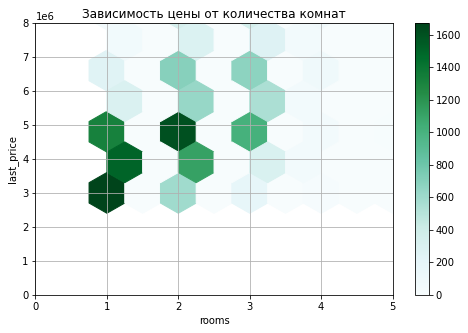

In [108]:
df.plot(x='rooms', y='last_price', kind='hexbin', gridsize=10, figsize=(8, 5), sharex=False, grid=True, title='Зависимость цены от количества комнат', legend = False) 
plt.ylim(0, 8000000)
plt.xlim(0, 5)

- Примерно в половине случаев действительно стоимость квартиры тем выше, чем больше комнат квартиры, но это необязательно так. 
- Из графика мы видим, что больше всего продаж 1 и 2-х комнатных квартир по цене 4,5-5,3 млн.

- **Зависимость цены от этажа**

In [109]:
#построим сводную табличку
df.pivot_table(index='floor_cat',values='last_price').sort_values(by = 'last_price')

,last_price
floor_cat,
первый,4.948142e+06
последний,5.411692e+06
другой,5.452176e+06


Text(0, 0.5, 'last_price')

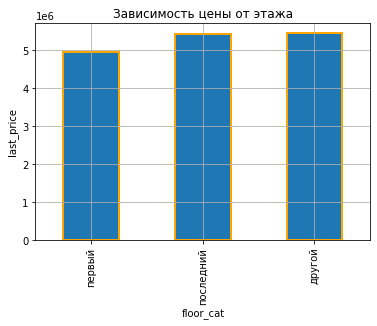

In [110]:
#визуализируем
df.pivot_table(index='floor_cat',values='last_price').sort_values(by = 'last_price').plot(y='last_price', kind='bar', grid=True, ec='orange', linewidth=2, title='Зависимость цены от этажа', legend = False)
plt.xlabel('floor_cat')
plt.ylabel('last_price')

Самые дешевые квартиры на первом этаже, чуть подороже на последнем и предпочтительнее для покупателей, конечно, другие этажи, все логично и предсказуемо.

In [111]:
#рассчитаем коэффициент Пирсона
df['last_price'].corr(df['floors_total'])

0.0081117201522768

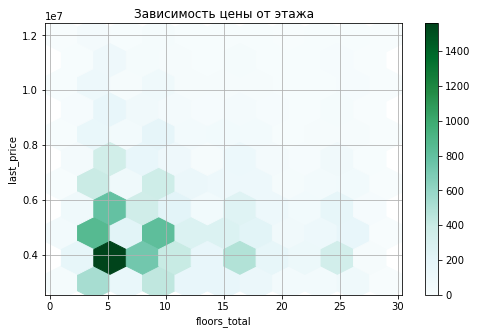

In [112]:
df.plot(x='floors_total', y='last_price', kind='hexbin', gridsize=10, figsize=(8, 5), sharex=False, grid=True, title='Зависимость цены от этажа', legend = False)


- Цена квартиры зависит от этажа, только если он первый или последний - тогда стоимость ниже остальных, для других этажей зависимости не наблюдается.
- Чаще всего покупают квартиры до 10 этажа по стоимости примерно от 3 до 5 млн руб.

- **Зависимость цены от удаленности от центра**

In [113]:
#сгруппируем расстояние до центра по диапазонам с помощью метода cut(), исключив выбросы
df['cityCenters_nearest_gr'] = pd.cut(df['cityCenters_nearest'],[181, 11000, 15000, 35000])

In [114]:
#исключаем выбросы, строим сводную табличку
df.pivot_table(index='cityCenters_nearest_gr',values='last_price').sort_values(by = 'last_price')

,last_price
cityCenters_nearest_gr,
"(15000, 35000]",4.921988e+06
"(11000, 15000]",5.028041e+06
"(181, 11000]",6.625382e+06


Text(0, 0.5, 'last_price')

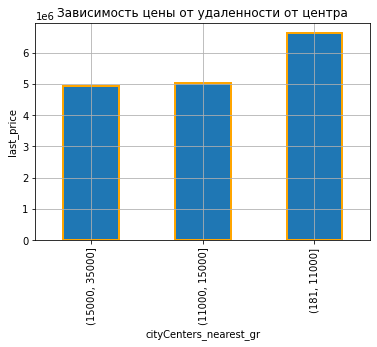

In [115]:
#визуализируем полученные данные
df.pivot_table(index='cityCenters_nearest_gr',values='last_price').sort_values(by = 'last_price').plot(y='last_price', kind='bar', grid=True, ec='orange', linewidth=2, title='Зависимость цены от удаленности от центра', legend = False)
plt.xlabel('cityCenters_nearest_gr')
plt.ylabel('last_price')

Чем ближе к центру, тем выше стоимость.

In [116]:
#рассчитаем коэффициент Пирсона
df['last_price'].corr(df['cityCenters_nearest'])

-0.28608469099157735

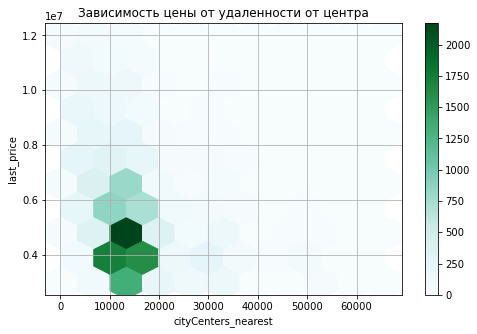

In [117]:
df.plot(x='cityCenters_nearest', y='last_price', kind='hexbin', gridsize=10, figsize=(8, 5), sharex=False, grid=True, title='Зависимость цены от удаленности от центра', legend = False) 

- Появилась обратная зависимость, чем ближе к центру, тем выше стоимость, но, опять же, так далеко не всегда бывает.
- Из графика мы видим, что чаще всего покупают квартиры от 10 до 20 км от центра примерно за 4 до 5 млн.

- **Зависимость цены от даты размещения: день недели, месяц, год**

- ```день недели```

In [118]:
df.pivot_table(index='day',values='last_price', aggfunc=['median'])

,median
,last_price
day,
воскресенье,4700000.0
вторник,4886956.5
понедельник,4750000.0
пятница,4750000.0
среда,4850000.0
суббота,4800000.0
четверг,4800000.0


Text(0, 0.5, 'last_price')

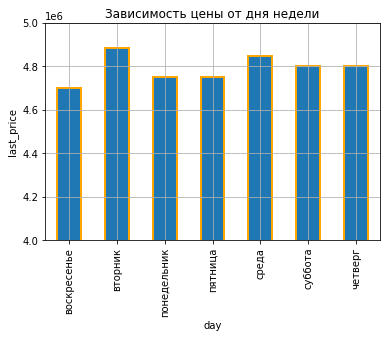

In [119]:
df.pivot_table(index='day',values='last_price', aggfunc=['median']).plot(y='median', kind='bar', grid=True, ec='orange', linewidth=2, title='Зависимость цены от дня недели', legend = False)
plt.ylim(4000000, 5000000)
plt.xlabel('day')
plt.ylabel('last_price')

- ```месяц```

In [120]:
df.pivot_table(index='month',values='last_price', aggfunc=['median'])

,median
,last_price
month,
1,4800000.0
2,4845000.0
3,4750000.0
4,4800000.0
5,4787500.0
6,4704595.0
7,4800000.0
8,4844025.0


Text(0, 0.5, 'last_price')

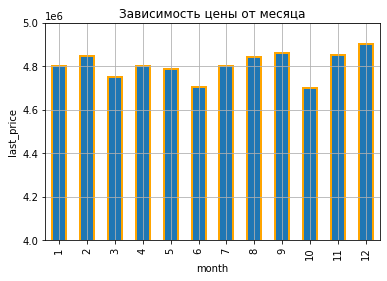

In [121]:
df.pivot_table(index='month',values='last_price', aggfunc=['median']).plot(y='median', kind='bar', grid=True, ec='orange', linewidth=2,title='Зависимость цены от месяца', legend = False)
plt.ylim(4000000, 5000000)
plt.xlabel('month')
plt.ylabel('last_price')

- ```год```

In [122]:
df.pivot_table(index='year',values='last_price', aggfunc=['median'])

,median
,last_price
year,
2014,5900000.0
2015,5200000.0
2016,4800000.0
2017,4750000.0
2018,4800000.0
2019,4950000.0


Text(0, 0.5, 'last_price')

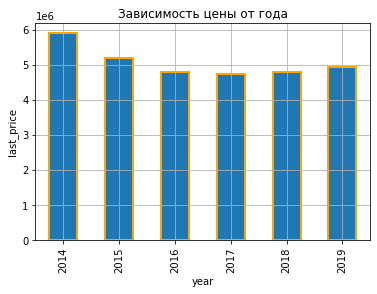

In [123]:
df.pivot_table(index='year',values='last_price', aggfunc=['median']).plot(y='median', kind='bar', grid=True, ec='orange', linewidth=2, title='Зависимость цены от года', legend = False)
plt.xlabel('year')
plt.ylabel('last_price')

- какой-то явной зависимости цены от дня недели не прослеживается;
- самая высокая стоимость у объявлений, которые выставили на продажу в декабре, а в июне заметно ниже, чем в другие месяцы.
- в 2014 году цены на недвижимость были самыми высокими, возможно, это связано с валютным кризисом в этот год.

- **Топ 10 населенных пунктов по количеству обявлений, средняя цена кв.м**

In [124]:
df['locality_name'].value_counts().index[:10]

Index(['Санкт-Петербург', 'посёлок Мурино', 'посёлок Шушары', 'Всеволожск',
       'Пушкин', 'посёлок Парголово', 'Колпино', 'деревня Кудрово', 'Гатчина',
       'Выборг'],
      dtype='object')

In [125]:
data_top10 = df[df['locality_name'].isin(('Санкт-Петербург', 'посёлок Мурино', 'посёлок Шушары', 'Всеволожск',
       'Пушкин', 'Колпино', 'посёлок Парголово', 'Гатчина', 'деревня Кудрово',
       'Выборг'))]

In [126]:
data_top10.groupby('locality_name')['price_m2'].agg(['mean', 'count']).sort_values(by='mean')

,mean,count
locality_name,,
посёлок Шушары,93994.843085,376
Выборг,96579.481132,212
Всеволожск,96604.918605,344
посёлок Парголово,97759.515358,293
Гатчина,97811.098113,265
Колпино,98559.311419,289
Санкт-Петербург,99130.254204,13619
Пушкин,99135.137380,313
посёлок Мурино,99866.149451,455


- Самая высокая стоимость жилья в Петербуге, а самая низкая в Лен. области в Выборге. Надо сказать, что в Выборге и самое маленькое количество объявлений о продаже недвижимости.

<a id='Анализ предложения квартир'></a>
#### *4.4 Анализ предложения квартир*

In [127]:
data_spb = df.query('locality_name == "Санкт-Петербург"')

In [128]:
data_spb['cityCenters_nearest_km'] = (data_spb['cityCenters_nearest'] / 1000)

In [129]:
data_spb['cityCenters_nearest_km'] = data_spb['cityCenters_nearest_km'].round()
data_spb['cityCenters_nearest_km'] = data_spb['cityCenters_nearest_km'].astype('int')

In [130]:
data_spb.groupby('cityCenters_nearest_km')['last_price'].agg(['mean', 'count']).sort_values(by='mean')

,mean,count
cityCenters_nearest_km,,
62,3.200000e+06,1
65,3.475000e+06,2
52,3.775833e+06,12
47,4.120750e+06,12
26,4.193247e+06,63
66,4.200000e+06,1
59,4.250000e+06,1
41,4.275000e+06,4
51,4.311438e+06,16


Text(0, 0.5, 'last_price')

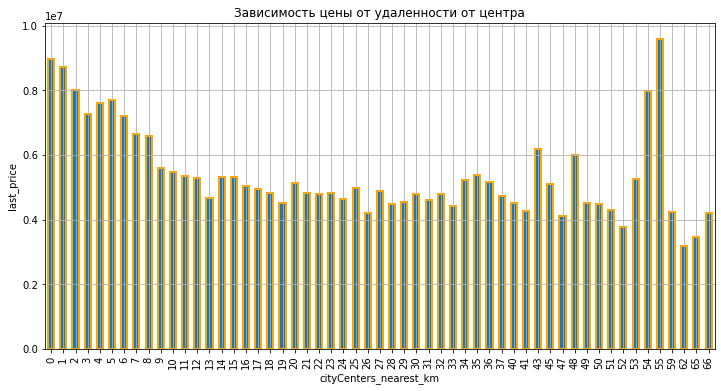

In [131]:
data_spb.pivot_table(index='cityCenters_nearest_km',values='last_price').sort_values(by = 'cityCenters_nearest_km').plot(y='last_price', kind='bar', grid=True, ec='orange', linewidth=2, figsize = (12, 6), title='Зависимость цены от удаленности от центра', legend = False)
plt.xlabel('cityCenters_nearest_km')
plt.ylabel('last_price')

- Начиная с 8 км стоимость недвижимости резко увеличивается, будем считать,что все, что находится в этом радиусе - центр города.

<a id='Анализ сегмента квартир в центре'></a>
#### *4.5 Анализ сегмента квартир в центре*

In [136]:
data_centre_spb = data_spb.query('cityCenters_nearest_km <= 8')
data_centre_spb.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,part_kitchen_area,price_m2,year,month,day,floor_cat,total_area_gr,cityCenters_nearest_gr,cityCenters_nearest_km,type_center
3,0,NaN,NaN,2015-07-24,3.0,2.65,14.0,90.0,9,False,...,0.172414,408176,2015,7,пятница,другой,NaN,"(181, 11000]",7,сenter
4,2,10000000.0,100.0,2018-06-19,2.0,NaN,14.0,32.0,13,False,...,0.410000,100000,2018,6,вторник,другой,"(70.0, 120.0]","(181, 11000]",8,сenter
24,8,6500000.0,97.0,2015-10-31,2.0,2.65,3.0,46.0,1,False,...,0.201646,67010,2015,10,суббота,первый,"(70.0, 120.0]","(181, 11000]",2,сenter
35,6,NaN,NaN,2017-06-26,5.0,2.65,5.0,104.0,4,False,...,0.114094,104026,2017,6,понедельник,другой,NaN,"(181, 11000]",4,сenter
51,7,NaN,NaN,2017-10-17,3.0,NaN,8.0,38.0,4,False,...,0.310559,279503,2017,10,вторник,другой,NaN,"(181, 11000]",7,сenter


- ***Рассмотрим параметры: площадь, цена, число комнат, высота потолков в центре Петербурга***

- ```total_area```

Text(0, 0.5, 'Количество объявлений')

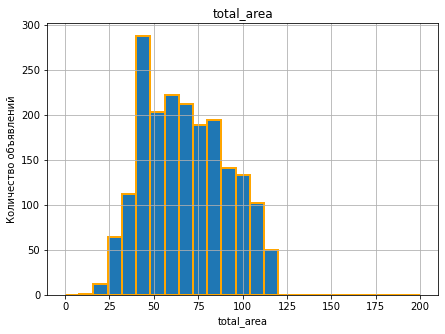

In [137]:
data_centre_spb.plot(kind='hist', y='total_area', range=(0,200), bins=25, linewidth=2, grid=True, figsize=(7,5), ec='orange', title='total_area', legend = False)
plt.xlabel('total_area')
plt.ylabel('Количество объявлений')

- ```rooms```

Text(0, 0.5, 'Количество объявлений')

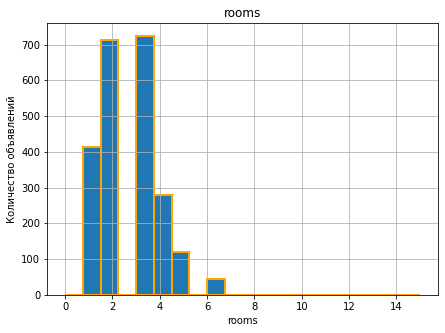

In [138]:
data_centre_spb.plot(kind='hist', y='rooms', range=(0,15), bins=20, linewidth=2, grid=True, figsize=(7,5), ec='orange', title='rooms', legend = False)
plt.xlabel('rooms')
plt.ylabel('Количество объявлений')

- ```last_price```

Text(0, 0.5, 'Количество объявлений')

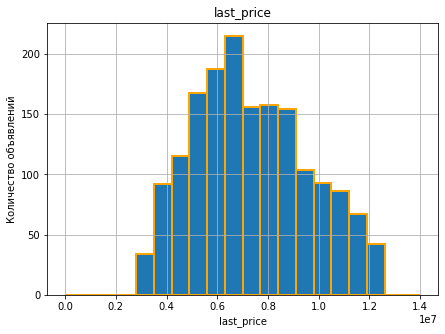

In [139]:
data_centre_spb.plot(kind='hist', y='last_price', range=(0,14000000), bins=20, linewidth=2, grid=True, figsize=(7,5), ec='orange', title='last_price', legend = False)
plt.xlabel('last_price')
plt.ylabel('Количество объявлений')

- ```ceiling_height```

Text(0, 0.5, 'Количество объявлений')

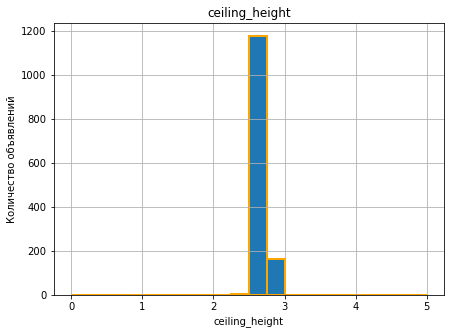

In [140]:
data_centre_spb.plot(kind='hist', y='ceiling_height', range=(0,5), bins=20, linewidth=2, grid=True, figsize=(7,5), ec='orange', title='ceiling_height', legend = False)
plt.xlabel('ceiling_height')
plt.ylabel('Количество объявлений')

- чаще всего люди покупают квартиры с площадью от 40 - 90 кв.м.;
- больше всего объявлений на 2-х и 3-х комнатные квартиры;
- наиболее распространенный ценовой диапазон в центре Петербурга от 4 до 10 млн. руб
- высота потолков большинства квартир 2 метра.

- ***Как число комнат, этаж, удалённость от центра, дата размещения объявления влияют на стоимость квартиры в центре Петербурга***

- ```число комнат```

In [141]:
#рассчитаем коэффициент Пирсона
data_centre_spb['last_price'].corr(data_centre_spb['rooms'])

0.49569053027141924

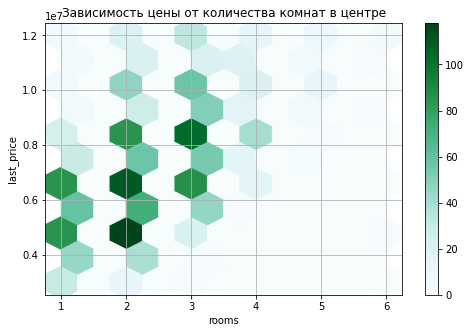

In [142]:
data_centre_spb.plot(x='rooms', y='last_price', kind='hexbin', gridsize=10, figsize=(8, 5), sharex=False, grid=True, title='Зависимость цены от количества комнат в центре', legend = False) 

- ```этаж```

Text(0, 0.5, 'last_price')

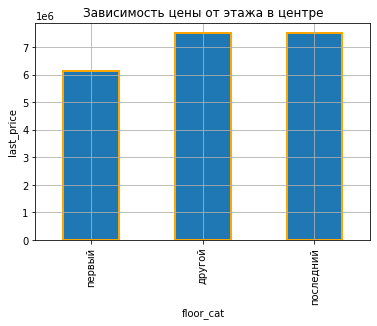

In [143]:
data_centre_spb.pivot_table(index='floor_cat',values='last_price').sort_values(by = 'last_price').plot(y='last_price', kind='bar', grid=True, ec='orange', linewidth=2, title='Зависимость цены от этажа в центре', legend = False)
plt.xlabel('floor_cat')
plt.ylabel('last_price')

- ```удаленность от центра```

In [152]:
#рассчитаем коэффициент Пирсона
data_centre_spb['last_price'].corr(data_centre_spb['cityCenters_nearest_km'])

-0.21660392279794327

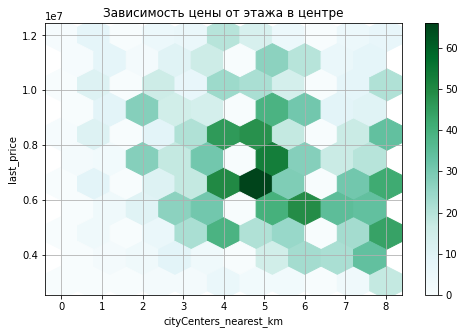

In [146]:
data_centre_spb.plot(x='cityCenters_nearest_km', y='last_price', kind='hexbin', gridsize=10, figsize=(8, 5), sharex=False, grid=True, title='Зависимость цены от этажа в центре', legend = False) 

- ```дата размещения: день недели, месяц и год```

Text(0, 0.5, 'last_price')

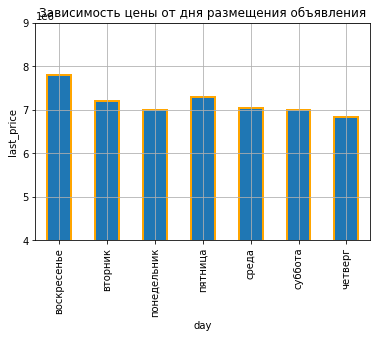

In [147]:
data_centre_spb.pivot_table(index='day',values='last_price', aggfunc=['median']).plot(y='median', kind='bar', grid=True, ec='orange', linewidth=2, title='Зависимость цены от дня размещения объявления', legend = False)
plt.ylim(4000000, 9000000)
plt.xlabel('day')
plt.ylabel('last_price')

Text(0, 0.5, 'last_price')

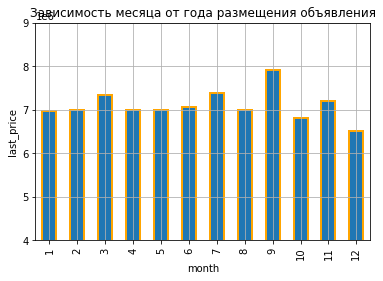

In [148]:
data_centre_spb.pivot_table(index='month',values='last_price', aggfunc=['median']).plot(y='median', kind='bar', grid=True, ec='orange', linewidth=2, title='Зависимость месяца от года размещения объявления', legend = False)
plt.ylim(4000000, 9000000)
plt.xlabel('month')
plt.ylabel('last_price')

Text(0, 0.5, 'last_price')

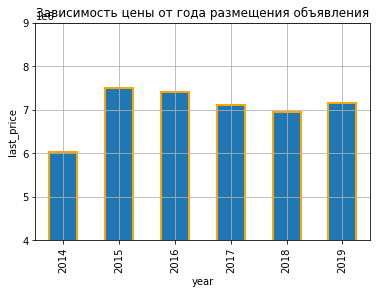

In [149]:
data_centre_spb.pivot_table(index='year',values='last_price', aggfunc=['median']).plot(y='median', kind='bar', grid=True, ec='orange', linewidth=2, title='Зависимость цены от года размещения объявления', legend = False)
plt.ylim(4000000, 9000000)
plt.xlabel('year')
plt.ylabel('last_price')

**Выводы:**

- в центре города все также популярны 2-х и 3-х комнатные квартиры
- квартиры на первом и последнем этаже продаются хуже остальных
- чаще всего покупают квартиры в 5-6 км от центра, стоимомстью 6-7 млн. руб
- особенностей цены квартиры от дня недели размещения объявления как не было, так и нет; на квартиры, размещенные к продаже в сентябре, стоимость выше; любопытно, что, в отличие от общей картины, максимальная стоимость квартир в центре приходится на 2015 год, а не на 2014.

<a id='Общий вывод'></a>
### Шаг 5. Общий вывод

- общая площадь квартир по Спб и Лен области до 50 кв.м., в центре Петербурга до 90 кв.м.
- стоимость жилья в среднем по Спб и Лен.области 4,5 млн, а в центре Петербурга до 10 млн.
- наиболее популярны 2 и 3- комнатные квартиры как в центре Петербурга, так и в целом по Спб и Лен области.
- высота потолков в центре Петербурга выше, конечно, и достигает в среднем 3 м, а в Спб и Лен области в среднем 2 м 
- самая высокая стоимость квартир в центре Петербурга была в 2015 года, а в Спб и Лен облатси в 2014 году
- В большей степени на стоимость квартиры как в Спб, так и в Лен. области оказывают влияние такие показатели, как: стоимость кв. м и общая площадь недвижимости, что логично, ведь они взаимозависимы.